<a href="https://colab.research.google.com/github/kareemullah123456789/cybersecurity_ML/blob/main/cyber_kdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Path to your dataset file
file_path = "/content/drive/MyDrive/NSL-KDD-Dataset-master/KDDTrain+.txt"

# Column names: 41 features + 1 label + 1 difficulty level
col_names = [f"f{i}" for i in range(1, 42)] + ["label", "difficulty"]

# Load dataset
data = pd.read_csv(file_path, names=col_names)

# Define attack categories
attack_category = {
    "normal": "Normal",

    # DoS
    "back": "DoS", "land": "DoS", "neptune": "DoS",
    "pod": "DoS", "smurf": "DoS", "teardrop": "DoS",

    # Probe
    "satan": "Probe", "ipsweep": "Probe",
    "nmap": "Probe", "portsweep": "Probe",

    # R2L
    "ftp_write": "R2L", "guess_passwd": "R2L", "imap": "R2L",
    "multihop": "R2L", "phf": "R2L", "spy": "R2L",
    "warezclient": "R2L", "warezmaster": "R2L",

    # U2R
    "buffer_overflow": "U2R", "loadmodule": "U2R",
    "perl": "U2R", "rootkit": "U2R"
}

# Map raw labels into categories
data["category"] = data["label"].map(attack_category)

# Check first few rows
print(data.head())

# Count per category
print("\nCategory distribution:")
print(data["category"].value_counts())


   f1   f2        f3  f4   f5    f6  f7  f8  f9  f10  ...   f35   f36   f37  \
0   0  tcp  ftp_data  SF  491     0   0   0   0    0  ...  0.03  0.17  0.00   
1   0  udp     other  SF  146     0   0   0   0    0  ...  0.60  0.88  0.00   
2   0  tcp   private  S0    0     0   0   0   0    0  ...  0.05  0.00  0.00   
3   0  tcp      http  SF  232  8153   0   0   0    0  ...  0.00  0.03  0.04   
4   0  tcp      http  SF  199   420   0   0   0    0  ...  0.00  0.00  0.00   

    f38   f39   f40   f41    label  difficulty  category  
0  0.00  0.00  0.05  0.00   normal          20    Normal  
1  0.00  0.00  0.00  0.00   normal          15    Normal  
2  1.00  1.00  0.00  0.00  neptune          19       DoS  
3  0.03  0.01  0.00  0.01   normal          21    Normal  
4  0.00  0.00  0.00  0.00   normal          21    Normal  

[5 rows x 44 columns]

Category distribution:
category
Normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64


In [8]:
attack_category = {
    "normal": "Normal",

    # DoS
    "back": "DoS", "land": "DoS", "neptune": "DoS",
    "pod": "DoS", "smurf": "DoS", "teardrop": "DoS",
    "apache2": "DoS", "udpstorm": "DoS", "processtable": "DoS",
    "worm": "DoS",

    # Probe
    "satan": "Probe", "ipsweep": "Probe", "nmap": "Probe",
    "portsweep": "Probe", "mscan": "Probe", "saint": "Probe",

    # R2L
    "ftp_write": "R2L", "guess_passwd": "R2L", "imap": "R2L",
    "multihop": "R2L", "phf": "R2L", "spy": "R2L",
    "warezclient": "R2L", "warezmaster": "R2L",
    "sendmail": "R2L", "named": "R2L", "snmpgetattack": "R2L",
    "snmpguess": "R2L", "xlock": "R2L", "xsnoop": "R2L",
    "worm": "R2L",   # appears in some docs as hybrid; safe to keep here

    # U2R
    "buffer_overflow": "U2R", "loadmodule": "U2R",
    "perl": "U2R", "rootkit": "U2R",
    "httptunnel": "U2R", "ps": "U2R", "sqlattack": "U2R",
    "xterm": "U2R"
}


In [9]:
data["category"] = data["label"].map(attack_category)


In [10]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f35,f36,f37,f38,f39,f40,f41,label,difficulty,category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset (already cleaned with category column)
file_path = "/content/drive/MyDrive/NSL-KDD-Dataset-master/KDDTrain+.txt"
col_names = [f"f{i}" for i in range(1, 42)] + ["label", "difficulty"]
data = pd.read_csv(file_path, names=col_names)

# Map to categories (use full mapping dict we built earlier!)
attack_category = {
    "normal": "Normal",

    # DoS
    "back": "DoS", "land": "DoS", "neptune": "DoS",
    "pod": "DoS", "smurf": "DoS", "teardrop": "DoS",
    "apache2": "DoS", "udpstorm": "DoS", "processtable": "DoS",
    "worm": "DoS",

    # Probe
    "satan": "Probe", "ipsweep": "Probe", "nmap": "Probe",
    "portsweep": "Probe", "mscan": "Probe", "saint": "Probe",

    # R2L
    "ftp_write": "R2L", "guess_passwd": "R2L", "imap": "R2L",
    "multihop": "R2L", "phf": "R2L", "spy": "R2L",
    "warezclient": "R2L", "warezmaster": "R2L",
    "sendmail": "R2L", "named": "R2L", "snmpgetattack": "R2L",
    "snmpguess": "R2L", "xlock": "R2L", "xsnoop": "R2L",

    # U2R
    "buffer_overflow": "U2R", "loadmodule": "U2R",
    "perl": "U2R", "rootkit": "U2R",
    "httptunnel": "U2R", "ps": "U2R", "sqlattack": "U2R",
    "xterm": "U2R"
}
  # <-- insert the full dictionary from before
data["category"] = data["label"].map(attack_category)

# Drop unused columns
X = data.drop(columns=["label", "difficulty", "category"])
y = data["category"]

# Identify categorical and numeric columns
categorical_cols = ["f2", "f3", "f4"]  # protocol_type, service, flag
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ])

# Full pipeline with RandomForest
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train/test split (use part of train set for validation first)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9181
      Normal       1.00      1.00      1.00     13422
       Probe       1.00      1.00      1.00      2357
         R2L       1.00      0.96      0.98       224
         U2R       1.00      0.27      0.43        11

    accuracy                           1.00     25195
   macro avg       1.00      0.85      0.88     25195
weighted avg       1.00      1.00      1.00     25195



In [13]:
pip install imbalanced-learn


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load dataset
file_path = "/content/drive/MyDrive/NSL-KDD-Dataset-master/KDDTrain+_20Percent.txt"
col_names = [f"f{i}" for i in range(1, 42)] + ["label", "difficulty"]
data = pd.read_csv(file_path, names=col_names)

# Mapping (use the full attack_category dict we built earlier)
attack_category = {
    "normal": "Normal",
    "back": "DoS", "land": "DoS", "neptune": "DoS",
    "pod": "DoS", "smurf": "DoS", "teardrop": "DoS",
    "apache2": "DoS", "udpstorm": "DoS", "processtable": "DoS", "worm": "DoS",
    "satan": "Probe", "ipsweep": "Probe", "nmap": "Probe",
    "portsweep": "Probe", "mscan": "Probe", "saint": "Probe",
    "ftp_write": "R2L", "guess_passwd": "R2L", "imap": "R2L",
    "multihop": "R2L", "phf": "R2L", "spy": "R2L",
    "warezclient": "R2L", "warezmaster": "R2L",
    "sendmail": "R2L", "named": "R2L", "snmpgetattack": "R2L",
    "snmpguess": "R2L", "xlock": "R2L", "xsnoop": "R2L",
    "buffer_overflow": "U2R", "loadmodule": "U2R",
    "perl": "U2R", "rootkit": "U2R",
    "httptunnel": "U2R", "ps": "U2R", "sqlattack": "U2R", "xterm": "U2R"
}

data["category"] = data["label"].map(attack_category)

# Features and target
X = data.drop(columns=["label", "difficulty", "category"])
y = data["category"]

# Categorical and numeric columns
categorical_cols = ["f2", "f3", "f4"]  # protocol_type, service, flag
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ])

# Build pipeline with SMOTE + RandomForest
clf = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42, sampling_strategy="auto")),  # oversample minority
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split into train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit model
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      1847
      Normal       0.99      1.00      1.00      2690
       Probe       1.00      0.98      0.99       458
         R2L       0.95      0.90      0.93        42
         U2R       0.00      0.00      0.00         2

    accuracy                           1.00      5039
   macro avg       0.79      0.78      0.78      5039
weighted avg       1.00      1.00      1.00      5039



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline  # NOTE: from imblearn, not sklearn
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

# --- Load & map ---
file_path = "/content/drive/MyDrive/NSL-KDD-Dataset-master/KDDTrain+.txt"
col_names = [f"f{i}" for i in range(1, 42)] + ["label", "difficulty"]
data = pd.read_csv(file_path, names=col_names)

attack_category = {
    "normal": "Normal",
    # DoS
    "back": "DoS","land": "DoS","neptune": "DoS","pod": "DoS","smurf": "DoS","teardrop": "DoS",
    "apache2": "DoS","udpstorm": "DoS","processtable": "DoS","worm": "DoS",
    # Probe
    "satan": "Probe","ipsweep": "Probe","nmap": "Probe","portsweep": "Probe","mscan": "Probe","saint": "Probe",
    # R2L
    "ftp_write": "R2L","guess_passwd": "R2L","imap": "R2L","multihop": "R2L","phf": "R2L","spy": "R2L",
    "warezclient": "R2L","warezmaster": "R2L","sendmail": "R2L","named": "R2L","snmpgetattack": "R2L",
    "snmpguess": "R2L","xlock": "R2L","xsnoop": "R2L",
    # U2R
    "buffer_overflow": "U2R","loadmodule": "U2R","perl": "U2R","rootkit": "U2R",
    "httptunnel": "U2R","ps": "U2R","sqlattack": "U2R","xterm": "U2R"
}
data["category"] = data["label"].map(attack_category)

X = data.drop(columns=["label", "difficulty", "category"])
y = data["category"]

# --- Split (stratified) ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Preprocess: OHE for 3 cats, scale numerics ---
categorical_cols = ["f2", "f3", "f4"]  # protocol_type, service, flag
numeric_cols = [c for c in X.columns if c not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ],
    remainder="drop"
)

# --- SMOTE config ---
# U2R is tiny; set k_neighbors=1. sampling_strategy grows only minority classes.
smote = SMOTE(random_state=42, k_neighbors=1, sampling_strategy={
    "U2R": 800,   # grow to ~800 samples
    "R2L": 4000   # grow to ~4k samples
    # leave Normal/DoS/Probe alone
})

# --- Classifier ---
clf = BalancedRandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# --- Pipeline: preprocess -> SMOTE(train only) -> classifier ---
pipe = Pipeline(steps=[
    ("pre", preprocessor),
    ("smote", smote),
    ("clf", clf)
])

# --- Fit & eval ---
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred, zero_division=0))


              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00      9186
      Normal       1.00      0.99      1.00     13469
       Probe       0.98      0.99      0.99      2331
         R2L       0.81      0.99      0.89       199
         U2R       0.29      1.00      0.45        10

    accuracy                           0.99     25195
   macro avg       0.82      0.99      0.87     25195
weighted avg       1.00      0.99      1.00     25195



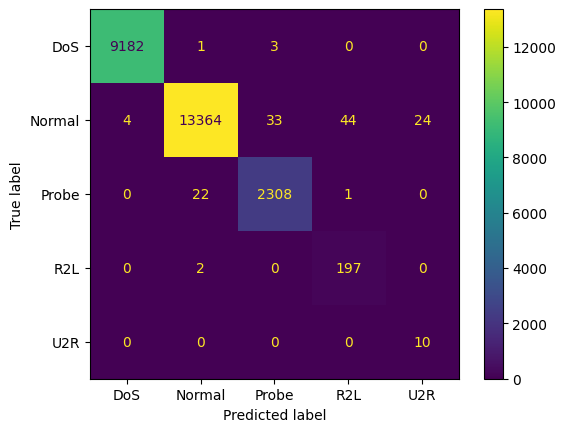

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()
